In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
column_description = pd.read_excel('E Commerce Dataset.xlsx', sheet_name=0, usecols=[2, 3])
column_description 

,Unnamed: 2,Unnamed: 3
0,Variable,Discerption
1,CustomerID,Unique customer ID
2,Churn,Churn Flag
3,Tenure,Tenure of customer in organization
4,PreferredLoginDevice,Preferred login device of customer
5,CityTier,City tier
6,WarehouseToHome,Distance in between warehouse to home of customer
7,PreferredPaymentMode,Preferred payment method of customer
8,Gender,Gender of customer
9,HourSpendOnApp,Number of hours spend on mobile application or...


In [7]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name=1)
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


There is no apparent mismatch between the datatype of the features and the information they deliver. Categorical and numerical columns are assigned the proper datatypes. But, CityTier should be object type since it's a categorical feature.

In [8]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

from the distribution description of the features, the following insights can be gained.
1. more than 75% of customers has a tenure of less than 16 months.
2. more than half of the customers have spent at least 3 hrs on the app, and have registered atleast 4 devices.
3. moree than half of the customers have satisfaction sore of above 3 which indicates overall absence of dissatisfaction on the app. And also, around 28.55% of customers has complained.
4. there is an average of 15.7 order amount hike from the last year, which indicates growth of the app.


In [9]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


if we decide to drop than Nan values, the number of features would be reduced by 35% or the dataset would be 67% (3774 rows) of the original size. Hence, dropping all the Nan values would result in loss of significant information. We can try to drop and impute some of them or impute the whole missing values. 

In [10]:
df.isnull().mean()*100


CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

<Axes: >

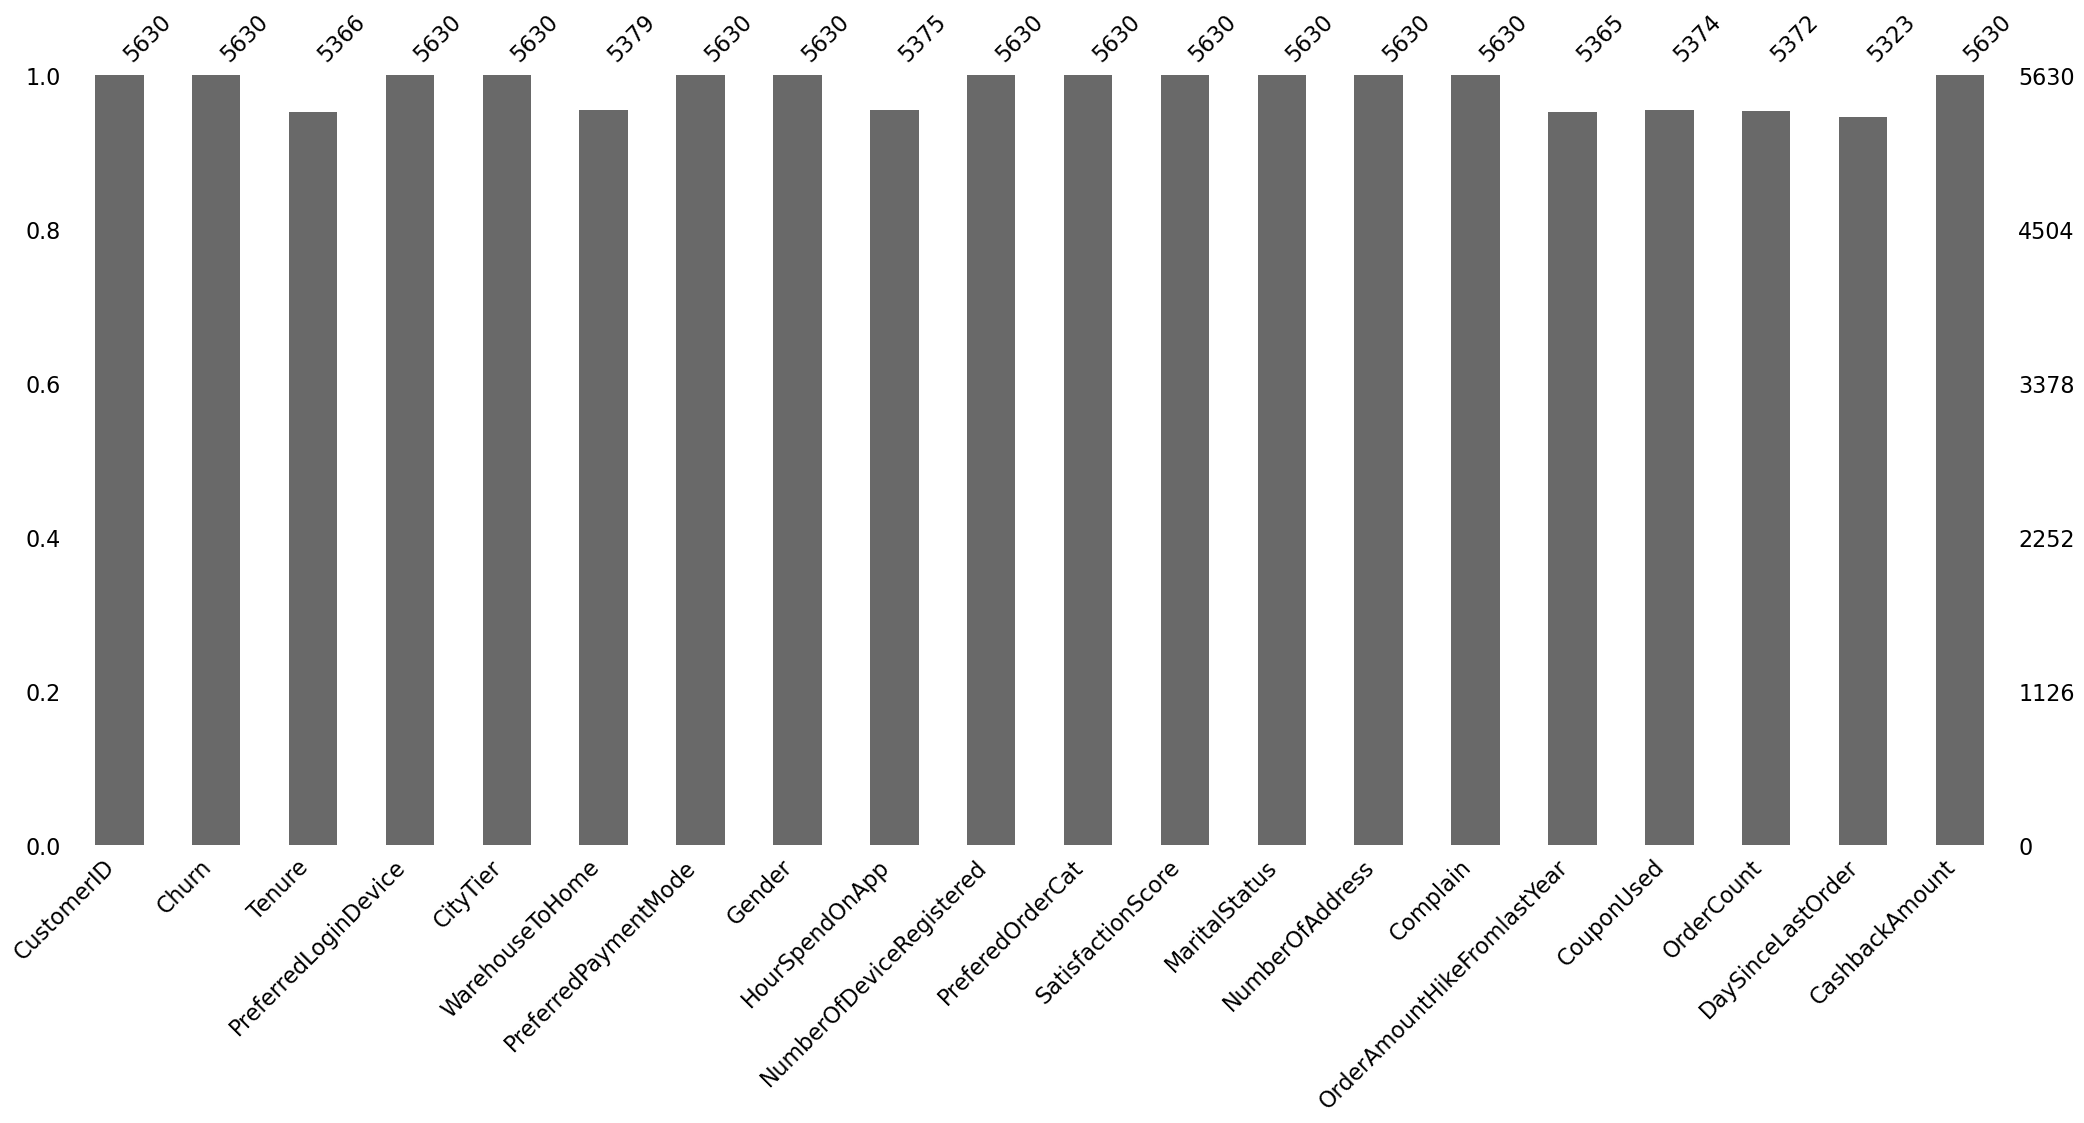

In [11]:
import missingno as msno
msno.bar(df)

Before moving on to handle the missing values, it is important to understand the types of missing values. This is importand to decide how to handle the missing values. According to Wikipedia, here are the types of missing values and their causes:
## 1. Missing Completely at Random (MCAR)

The missing values on a given variable (Y) are not associated with other variables in a given data set or with the variable (Y) itself. In other words, there is no particular reason for the missing values.

## 2. Missing at Random (MAR)

MAR occurs when the missingness is not random, but where missingness can be fully accounted for by variables where there is complete information. There is a relationship between the missing feature and other features inn the dataset. Men hide salary and female hide age. In this case, salary and age missing can be accounted for by the sex.

## 3. Missing Not at Random (MNAR)

Missingness depends on unobserved data or the value of the missing data itself. If a person declines to take survey because of depression, the missing values is dependent onn the feature itself. The data is missing because the person is depressed.

All definitions taken from Wikipedia: https://en.wikipedia.org/wiki/Missing_data

Now let us look at nullity matrix again to see if can find what type of missingness is present in the dataset.

In [12]:
missing_features = ["Tenure", "WarehouseToHome", "HourSpendOnApp", "OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount","DaySinceLastOrder"]
#msno.matrix(df)

To understnad the correlationn between nullity of the each columns, we can use the missingno library to draw a heatmap.
Fromm the heatmap, we can see that their is no correlationn between the missing values of features with Nan values.

<Axes: >

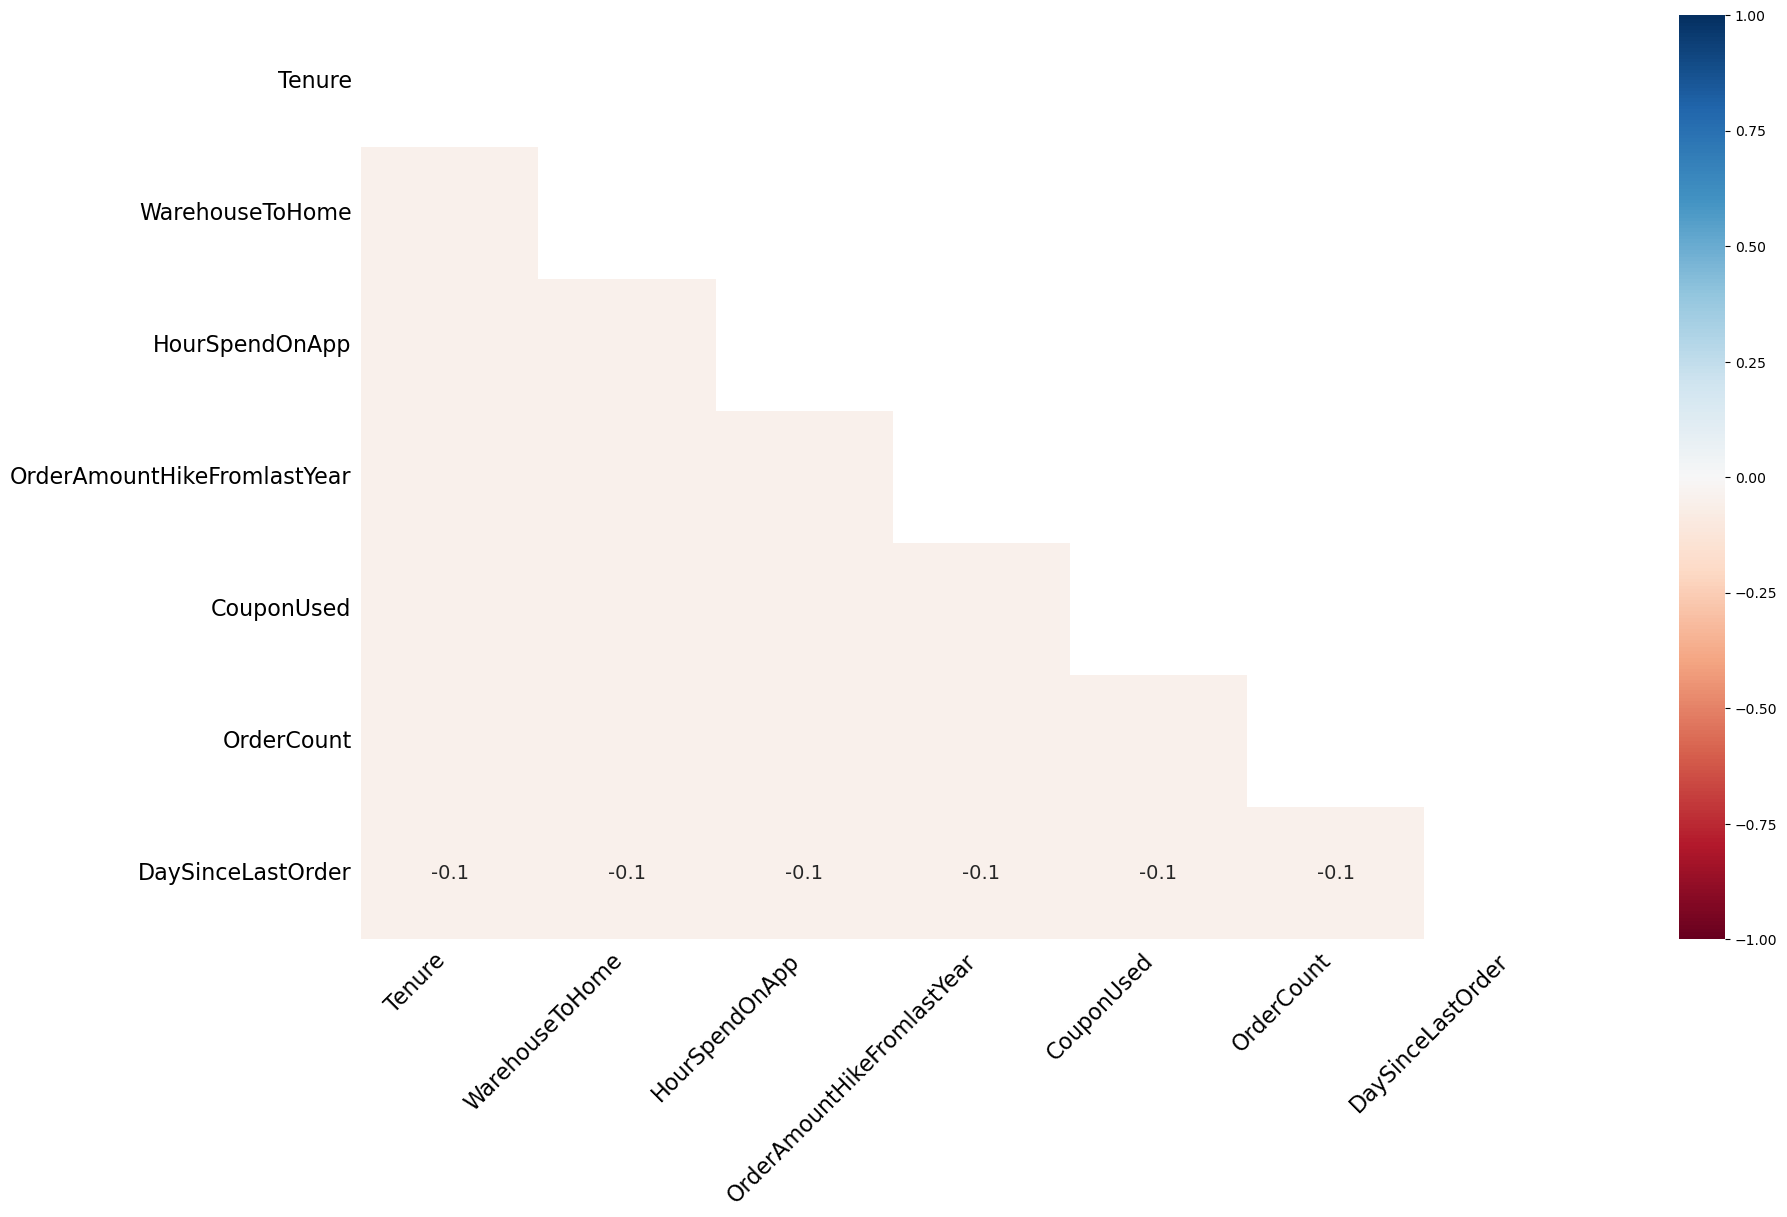

In [13]:
msno.heatmap(df)

In [14]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

from the above observation and the definition of types of missing values, the following could be understood:
1. Tenure is MNAR because churned customers are more likely to have Nan vaues
2. WarehouseToHome is MCAR because it is not related/affected by any other variable.
3. HourSpendOnApp is MAR because the PreferredLoginDevice type, for example phone or laptop, could create Nan values
4. OrderAmountHikeFromlastYear is MAR, can be related to SatisfactionScore
5. Coupon used is also MAR
6. OrderCount is MAR because it can be related to SatisfactionScore
7. DaySinceLastOrder is affected by SatisfactionScore, so it is MAR.

In [15]:
df1 = np.where(df['Tenure'].isnull(), 1, 0)
df1.groupby(['Churn'])['tenure_nan'].mean()
# we can see that churned customers has more vissing values.

AttributeError: 'numpy.ndarray' object has no attribute 'groupby'

Although the missing values are not more than 6% per column, i decided to use a more accurate form of imputation. 
A type of multivariate imputation called MICE imputes one variable at a time using the other variables as predictors. The MICE approach is good for both MCAR and MAR.

Multiple imputation by chained equations (MICE) is not recommended for imputing MNAR data because it assumes that the missingness mechanism is MAR. In the presence of MNAR data, valid statistical inference often requires joint models for missing observations and their indicators of missingness.The Heckman imputation models for binary or continuous MNAR outcomes and MAR predictors is one such model that can be used to handle MNAR data

Hence, we will use both Heckman and HMIC to impute the features.

#### visualizing the distribution of the columns with missing values before imputation


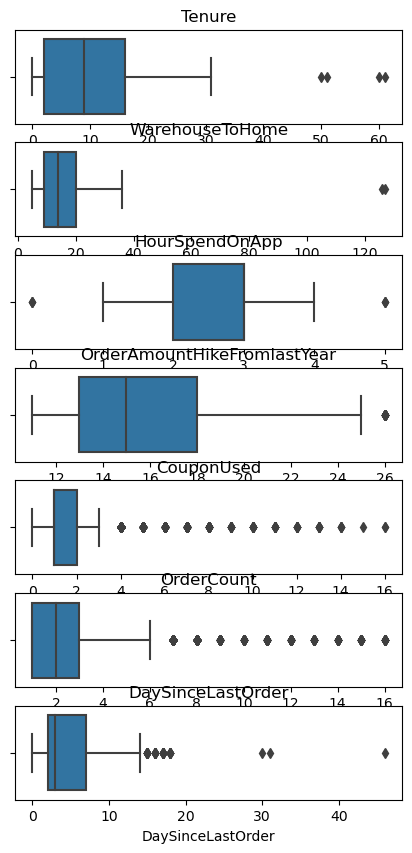

In [16]:
fig, axes = plt.subplots(len(missing_features), 1, figsize=(5, 10))
for i, feature in enumerate(missing_features):
    sns.boxplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(feature)
plt.show()

In [17]:
df_mice = pd.read_excel('E Commerce Dataset.xlsx', sheet_name=1)
df_mice.columns
df_mice.drop(['CustomerID'], axis=1, inplace=True)

numerical_cols = list(df_mice.dtypes.index[df_mice.dtypes != 'object'])
numerical_cols.remove('Churn')

### visualizing and handling outlier
almost all the numerical columns have outliers

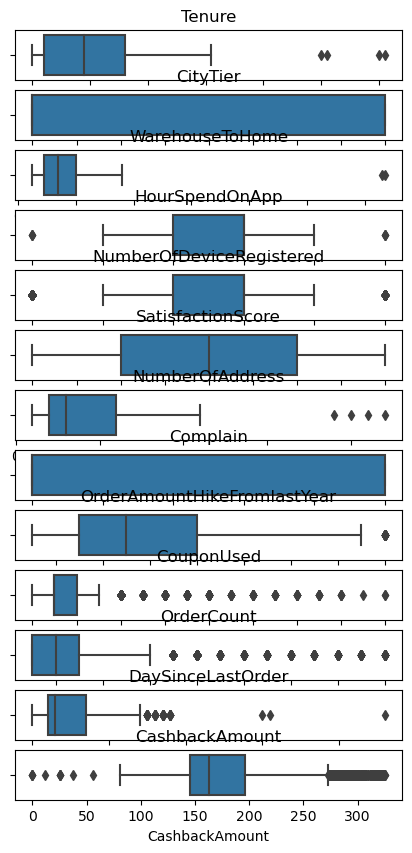

In [18]:
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(5, 10))
for i, feature in enumerate(numerical_cols):
    sns.boxplot(data=df_mice, x=feature, ax=axes[i])
    axes[i].set_title(feature)
plt.show()

In [19]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

for column in numerical_cols:
    lr,ur=remove_outlier(df_mice[column])
    df_mice[column]=np.where(df_mice[column]>ur,ur,df_mice[column])
    df_mice[column]=np.where(df_mice[column]<lr,lr,df_mice[column])

In [20]:
mnar_columns = df_mice['Tenure']
df_mice.drop(['Tenure'], inplace=True, axis=1)
df_mice.head()


,Churn,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,Mobile Phone,3.0,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,159.93
1,1,Phone,1.0,8.0,UPI,Male,3.0,4.0,Mobile,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,120.90
2,1,Phone,1.0,30.0,Debit Card,Male,2.0,4.0,Mobile,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.28
3,1,Phone,3.0,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.07
4,1,Phone,1.0,12.0,CC,Male,NaN,3.0,Mobile,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,129.60


### MICE IMPUTATION
since this method is not great fit for MNAR column, we will drop the Tenure column and impute the rest of the Nan columns

### Since the multivariable imputation technique require the categorical variable to be encoded, handling those columns has to be the first task

Our number of features are no more than 21, hence adding additional features by using one hot encoding will not create the curse of dimensionality problem for ML model later.

In [21]:
df_mice.dtypes
categorical_features = ["PreferredLoginDevice", "PreferredPaymentMode", "Gender", "PreferedOrderCat", "MaritalStatus"]
for feature in categorical_features:
    print('feature: ', feature, ' has ', len(df_mice[feature].unique()), ' unique features: ', df_mice[feature].unique())

feature:  PreferredLoginDevice  has  3  unique features:  ['Mobile Phone' 'Phone' 'Computer']
feature:  PreferredPaymentMode  has  7  unique features:  ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
feature:  Gender  has  2  unique features:  ['Female' 'Male']
feature:  PreferedOrderCat  has  6  unique features:  ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
feature:  MaritalStatus  has  3  unique features:  ['Single' 'Divorced' 'Married']


In [22]:
df_mice['PreferredPaymentMode'] = np.where(df_mice['PreferredPaymentMode']=='Credit Card', 'CC', df_mice['PreferredPaymentMode'])
df_mice['PreferredPaymentMode'] = np.where(df_mice['PreferredPaymentMode']=='Cash on Delivery', 'COD', df_mice['PreferredPaymentMode'])
df_mice['PreferedOrderCat'] = np.where(df_mice['PreferedOrderCat']=='Mobile Phone', 'Mobile', df_mice['PreferedOrderCat'])
df_mice['PreferredLoginDevice'] = np.where(df_mice['PreferredLoginDevice']=='Mobile Phone', 'Phone', df_mice['PreferredLoginDevice'])

In [23]:
df = df_mice

In [24]:
df_mice = pd.get_dummies(df_mice, columns=categorical_features)

In [25]:
from fancyimpute import IterativeImputer
imputer = IterativeImputer()
df_mice_array = imputer.fit_transform(df_mice)

In [26]:
df_miced = pd.DataFrame(df_mice_array, columns=list(df_mice.columns))
df_miced.head()

,Churn,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1.0,3.0,6.0,3.00000,3.0,2.0,9.0,1.0,11.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,8.0,3.00000,4.0,3.0,7.0,1.0,15.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,1.0,30.0,2.00000,4.0,3.0,6.0,1.0,14.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,3.0,15.0,2.00000,4.0,5.0,8.0,0.0,23.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,12.0,2.57439,3.0,5.0,3.0,0.0,11.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [27]:
df_miced.isnull().sum()

Churn                                  0
CityTier                               0
WarehouseToHome                        0
HourSpendOnApp                         0
NumberOfDeviceRegistered               0
SatisfactionScore                      0
NumberOfAddress                        0
Complain                               0
OrderAmountHikeFromlastYear            0
CouponUsed                             0
OrderCount                             0
DaySinceLastOrder                      0
CashbackAmount                         0
PreferredLoginDevice_Computer          0
PreferredLoginDevice_Phone             0
PreferredPaymentMode_CC                0
PreferredPaymentMode_COD               0
PreferredPaymentMode_Debit Card        0
PreferredPaymentMode_E wallet          0
PreferredPaymentMode_UPI               0
Gender_Female                          0
Gender_Male                            0
PreferedOrderCat_Fashion               0
PreferedOrderCat_Grocery               0
PreferedOrderCat

### visualizing and interprating the imputation alongside the non-imputed versions and also imputing using conventional methods like mean and median.
kde will be used for visualization.
As stated at the beggining, simple imputation could have been possible and would be quite sufficient since the percentage of missing valeus are small relative to the size of each features(<6%). Hence, there might not be apparent difference between the mean imputed, MICE imputed, and unimputed dataset on the kde plot. However, it is still observable that MICE is better.

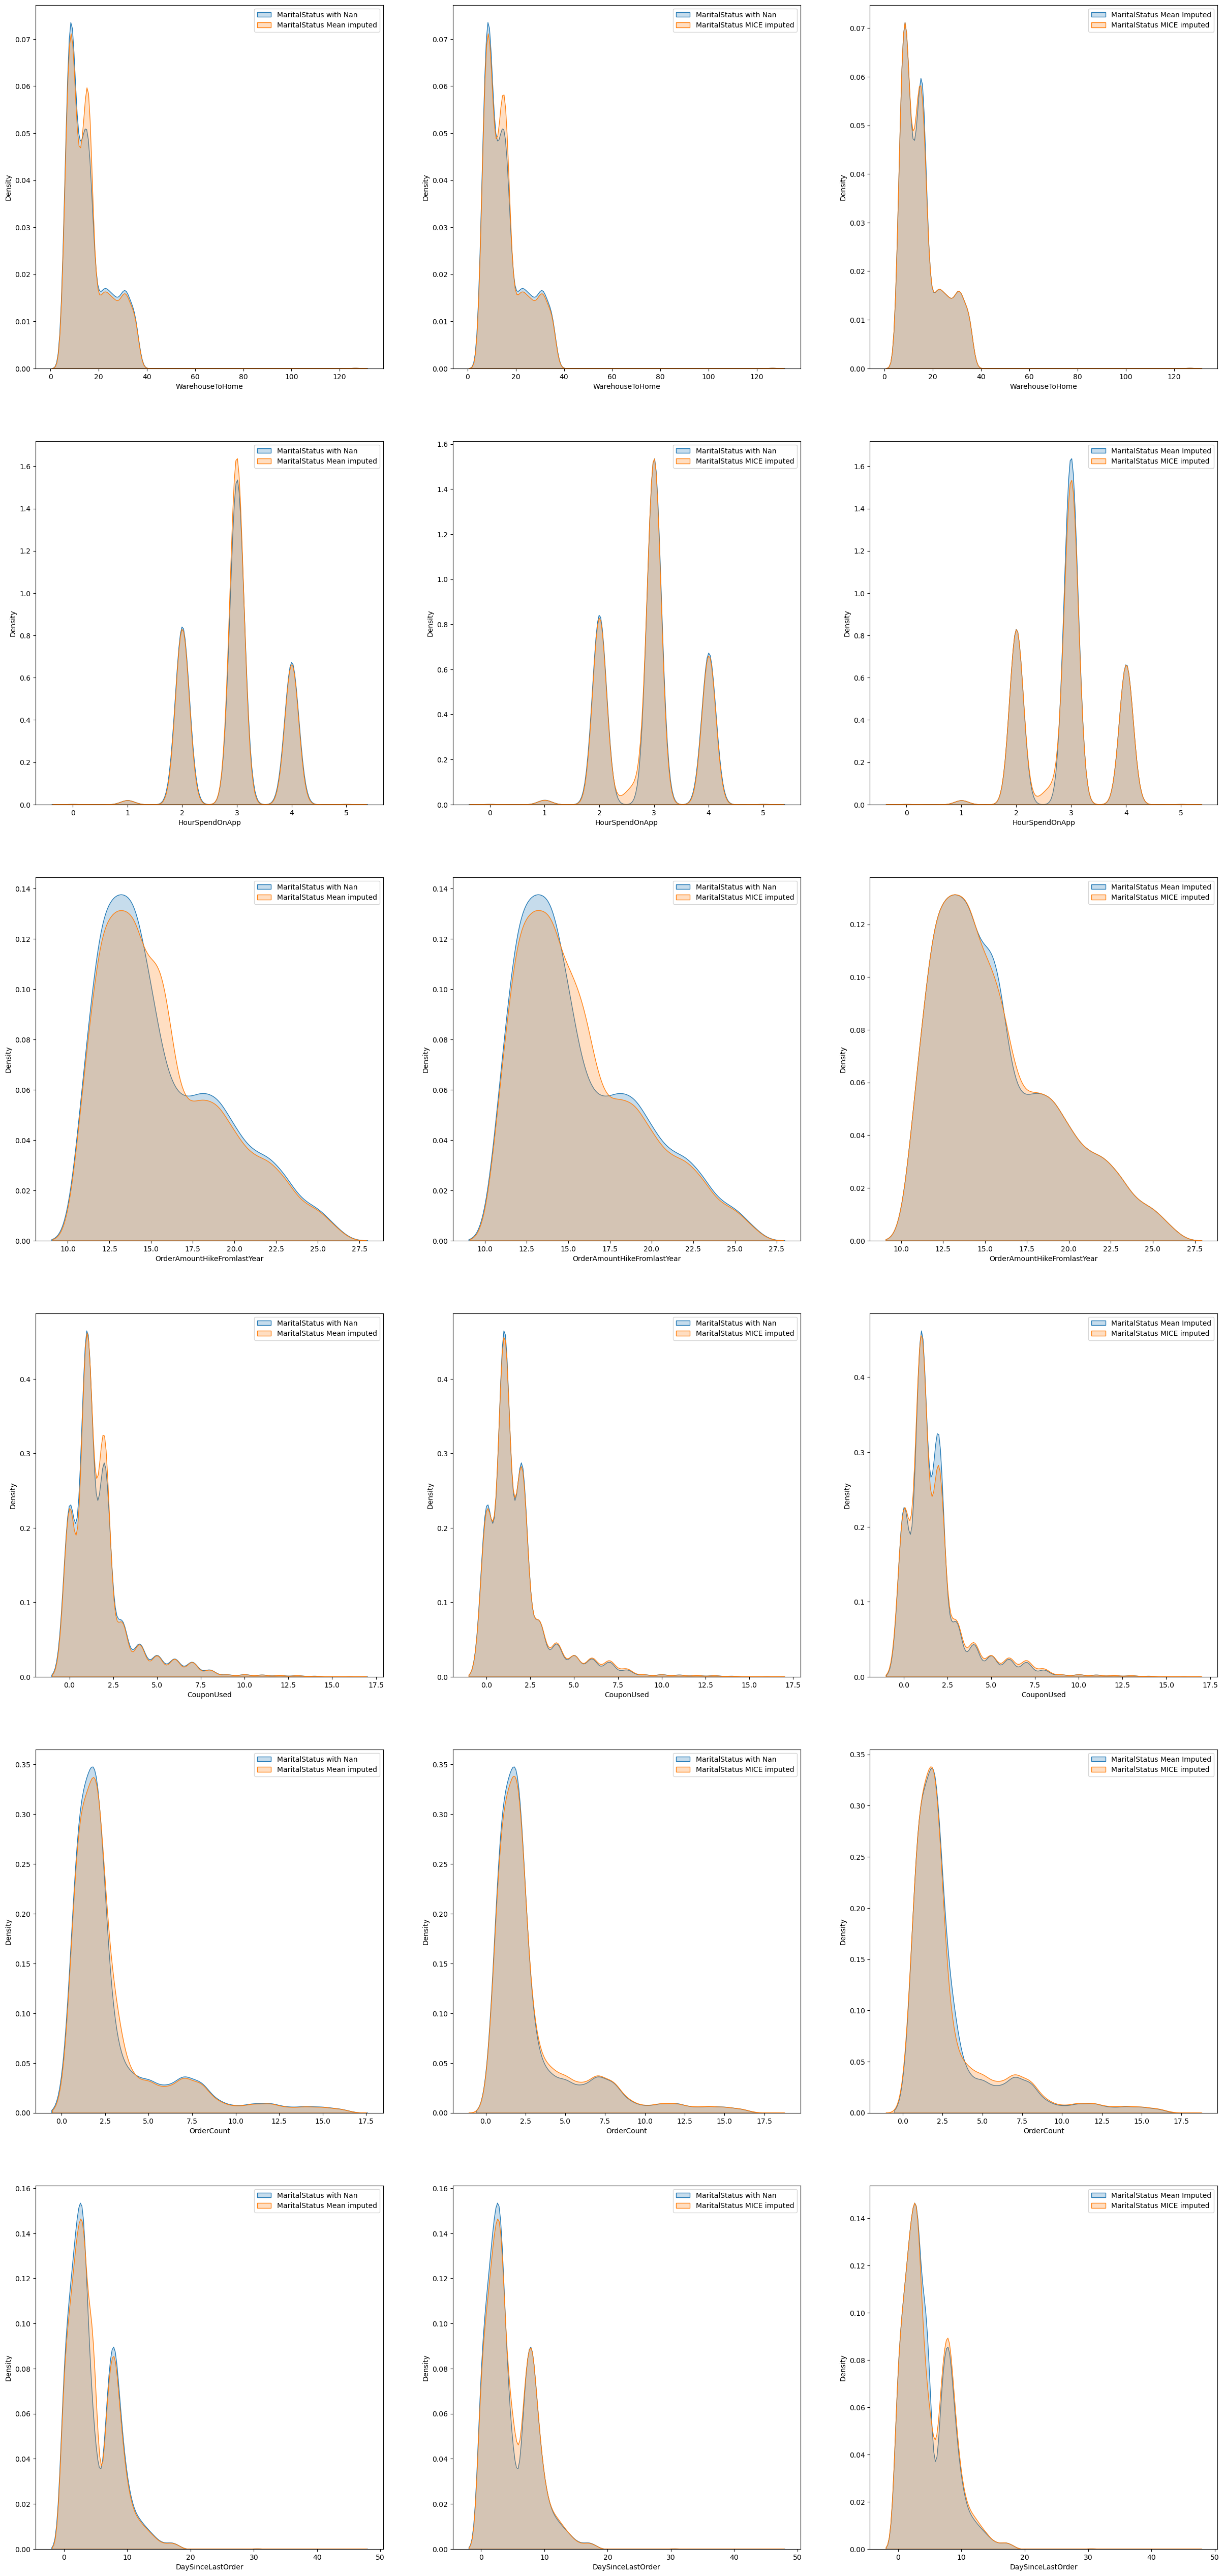

In [28]:
figure, axs = plt.subplots(6, 3, figsize=(30, 65), squeeze=False)
for i, features in enumerate(missing_features[1:]):
    
    sns.kdeplot(df_mice[features], fill=True, ax=axs[i, 0])
    sns.kdeplot(df_mice[features].fillna(df_mice[features].mean()), fill=True, ax=axs[i, 0])
    axs[i, 0].legend([feature + ' with Nan', feature + ' Mean imputed'])

    sns.kdeplot(df_mice[features], fill=True, ax=axs[i, 1])
    sns.kdeplot(df_miced[features], fill=True, ax=axs[i, 1])
    axs[i, 1].legend([feature + ' with Nan', feature + ' MICE imputed'])
    
    sns.kdeplot(df_mice[features].fillna(df_mice[features].mean()), fill=True, ax=axs[i, 2])
    sns.kdeplot(df_miced[features], fill=True, ax=axs[i, 2])
    axs[i, 2].legend([feature + ' Mean Imputed', feature + ' MICE imputed'])



In [29]:
df_miced['Tenure'] = mnar_columns

In [30]:
predictors = list(set(df_miced.columns) - set('Tenure'))
predictors.remove('Tenure')

In [31]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
mnar_data = imputer.fit_transform(df_miced)
df_miced = pd.DataFrame(mnar_data, columns=list(df_miced.columns))


In [32]:
'''
from statsmodels.api import Logit

mnar_column = 'Tenure'
mnar_data = df_miced
mnar_data = mnar_data.dropna(subset=predictors)
mnar_data[mnar_column] = np.where(mnar_data[mnar_column].isnull(), 1, 0)# mnar_data[mnar_column])

model = Logit(mnar_data[mnar_column], mnar_data[predictors])
fitted_model = model.fit()
mnar_data[mnar_column] = fitted_model.predict(mnar_data[predictors])
df_miced[mnar_column] = np.where(df_miced[mnar_column].isnull(), mnar_data[mnar_column], df_miced[mnar_column])
'''

"\nfrom statsmodels.api import Logit\n\nmnar_column = 'Tenure'\nmnar_data = df_miced\nmnar_data = mnar_data.dropna(subset=predictors)\nmnar_data[mnar_column] = np.where(mnar_data[mnar_column].isnull(), 1, 0)# mnar_data[mnar_column])\n\nmodel = Logit(mnar_data[mnar_column], mnar_data[predictors])\nfitted_model = model.fit()\nmnar_data[mnar_column] = fitted_model.predict(mnar_data[predictors])\ndf_miced[mnar_column] = np.where(df_miced[mnar_column].isnull(), mnar_data[mnar_column], df_miced[mnar_column])\n"

<Axes: xlabel='Tenure', ylabel='Density'>

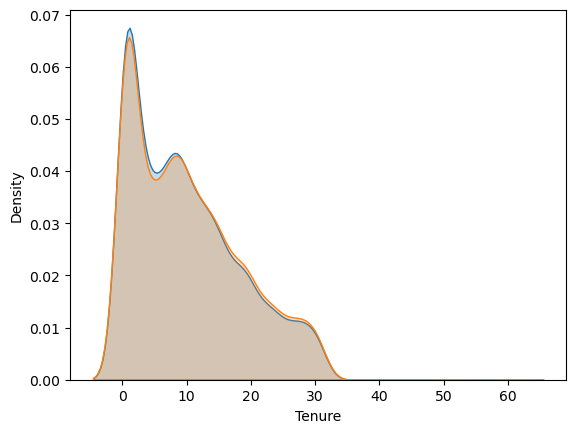

In [33]:
sns.kdeplot(df_miced['Tenure'], fill=True)
sns.kdeplot(mnar_columns, fill=True)

In [34]:
df_miced.to_csv('Imputed_df.csv')

# Explarotary Data Analysis(EDA)
The relationship between the features is analysed in depth. For EDA, we need our dataset to have no null value and for categorical values to be not one-hot encoded. Hence, we would create a dataset that contains the imputed variable from the above dataset, and non-one-hot-encoded dataset from the original dataframe. 

In [35]:
imputed_columns = df_miced[missing_features]
non_imputed = list(set(df.columns) - set(missing_features))
non_imputed_columns = df[non_imputed]

In [36]:
eda_df = non_imputed_columns.merge(imputed_columns, left_index=True, right_index=True)


In [37]:
eda_df.describe()

,CashbackAmount,Churn,SatisfactionScore,NumberOfDeviceRegistered,CityTier,NumberOfAddress,Complain,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,175.324229,0.168384,3.066785,3.695471,1.654707,4.207993,0.284902,9.966714,15.613348,2.919564,15.715532,1.789276,3.080779,4.648133
std,44.069817,0.374240,1.380194,0.942015,0.915389,2.555111,0.451408,8.469141,8.343224,0.708662,3.589086,1.921863,2.957925,3.619246
min,69.836250,0.000000,1.000000,1.500000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000,11.000000,0.000000,0.504910,0.000000
25%,145.770000,0.000000,2.000000,3.000000,1.000000,2.000000,0.000000,2.000000,9.000000,2.000000,13.000000,1.000000,1.000000,2.000000
50%,163.280000,0.000000,3.000000,4.000000,1.000000,3.000000,0.000000,8.000000,14.000000,3.000000,15.000000,1.000000,2.000000,3.910728
75%,196.392500,0.000000,4.000000,4.000000,3.000000,6.000000,1.000000,15.000000,20.000000,3.000000,18.000000,2.000000,3.000000,7.000000
max,272.326250,1.000000,5.000000,5.500000,3.000000,12.000000,1.000000,61.000000,127.000000,5.000000,26.000000,16.000000,17.200002,46.000000


In [ ]:
#eda_df.drop('CustomerID', inplace=True, axis=1)

In [ ]:
eda_df.dtypes

## 1.Univariate Analysis
we would plot individual catagorical features w.r.t to the target(churn) to understand the relationship between the categories in the feature and the tendency of churning.

In [38]:
categoricals = list(eda_df.dtypes[(eda_df.dtypes==object)==True].index) + ['CityTier']
categoricals

['Gender',
 'PreferedOrderCat',
 'PreferredLoginDevice',
 'PreferredPaymentMode',
 'MaritalStatus',
 'CityTier']

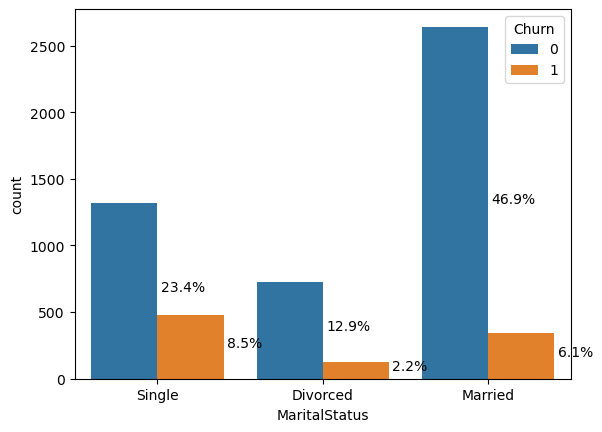

In [39]:
ax = sns.countplot(x="MaritalStatus", data=eda_df, hue = 'Churn')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(eda_df))
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))

plt.show()

In [40]:
contingency_table = pd.crosstab(eda_df['MaritalStatus'], eda_df['Churn'])
contingency_table

Churn,0,1
MaritalStatus,,
Divorced,724,124
Married,2642,344
Single,1316,480


from the plot below, the customer churn percentage is close to 16.8%. Knowing this, we will analyse the percentage of churners by each categorical variables.

0    83.161634
1    16.838366
Name: Churn, dtype: float64


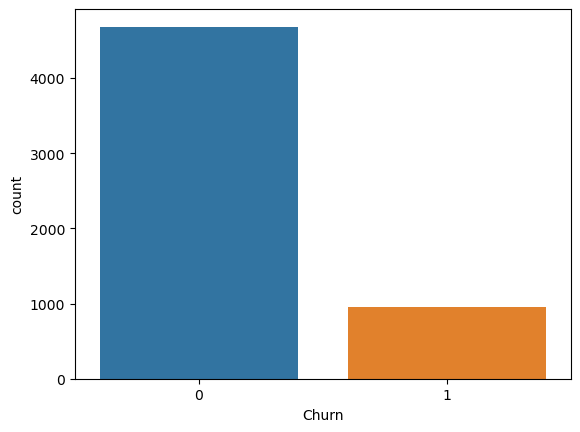

In [41]:
sns.countplot(data=eda_df, x='Churn')
print(eda_df['Churn'].value_counts()/len(eda_df)*100)

### Univariate Analysis Insights
1. more of customers that prefer COD and E wallet for payment are churners, which is higher proportion compared to normal churners.
2. customers that order Mobile Phone are has more tendency to churn.
3. Single customers are more churners as compared to married customers. Hence, creating a better product targeted for single customers could reduce the churners number.
4. Customers using computer to login churn more than other devices.
5. customers from CityTier 3 churn in more propertion than the others. 


In [42]:
categoricals

['Gender',
 'PreferedOrderCat',
 'PreferredLoginDevice',
 'PreferredPaymentMode',
 'MaritalStatus',
 'CityTier']

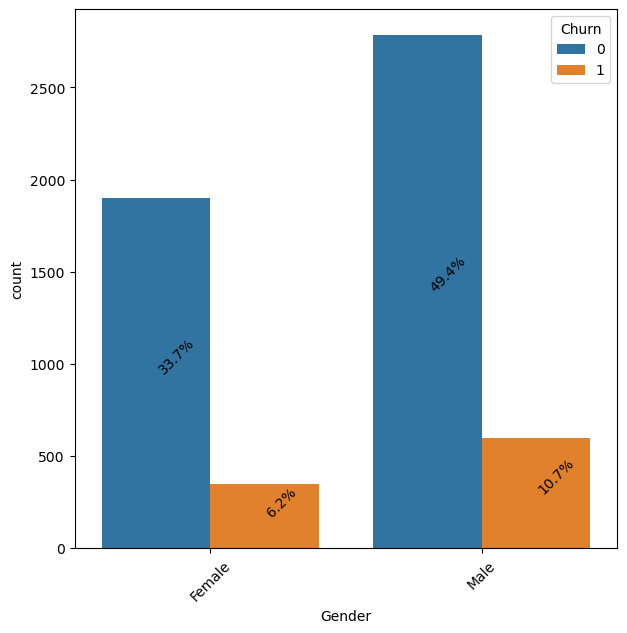

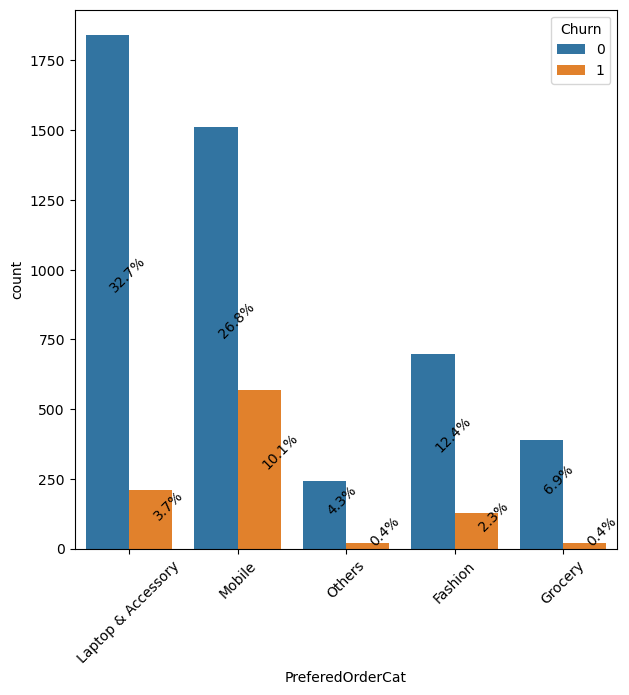

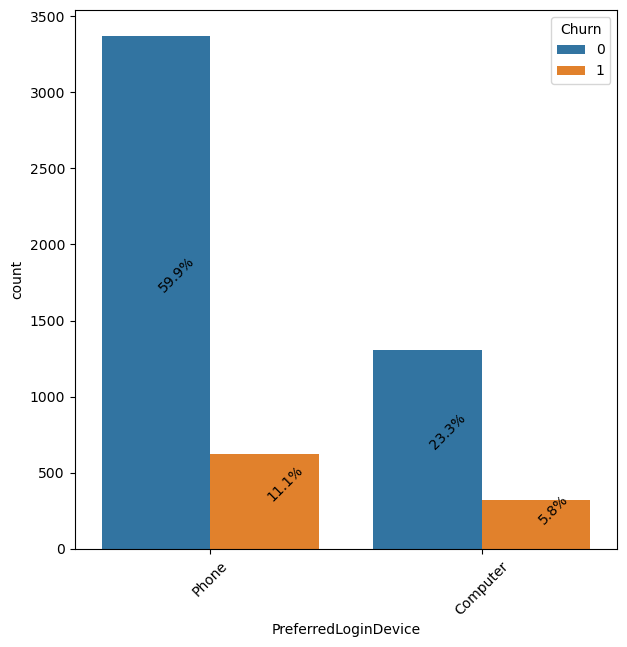

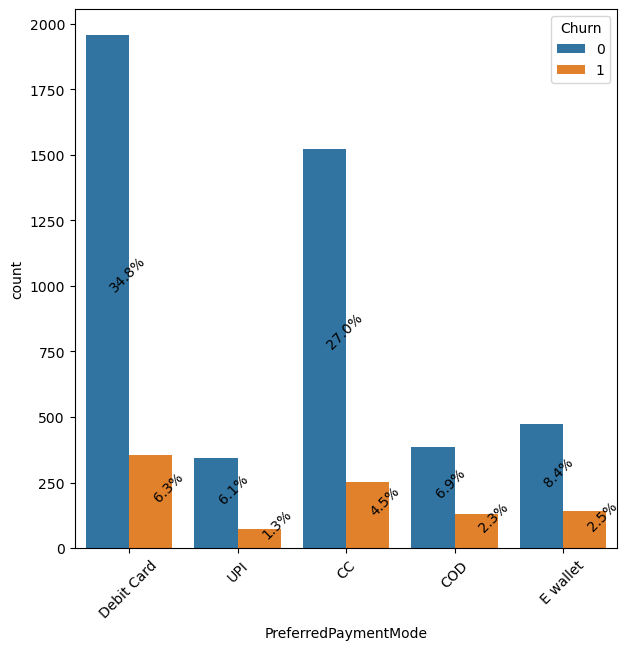

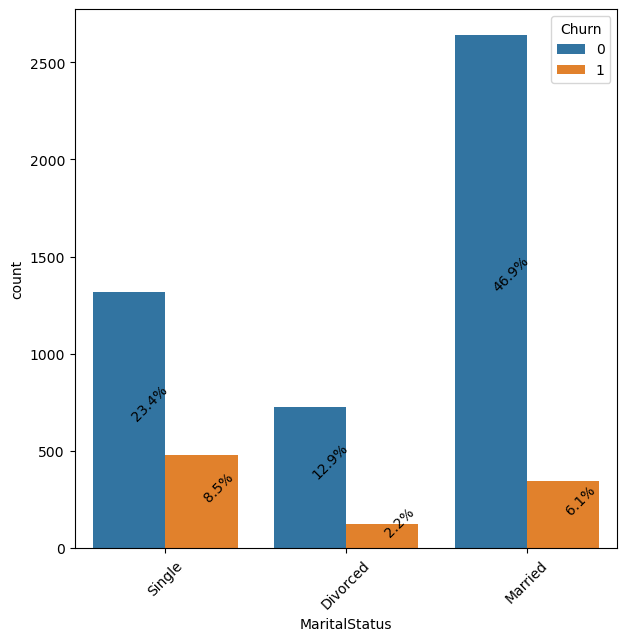

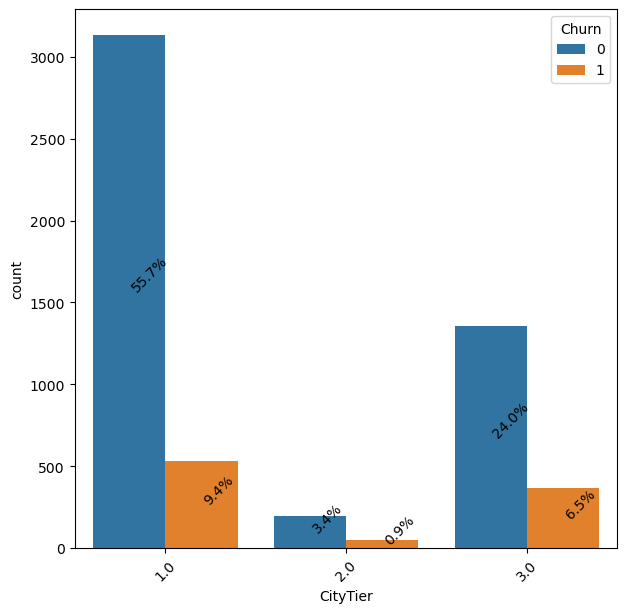

In [43]:
for i, feature in enumerate(categoricals):
    plt.figure(i, figsize=(7, 7))
    plt.xticks(rotation=45)
    ax = sns.countplot(data=eda_df, x=feature, hue='Churn', orient='v')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / len(eda_df))
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y), color='black', rotation=45)

    plt.show()

For the Numerical features.
1. There is a moderate correlation(0.5) between CashbackAmount and Tenure.Indicating the higher the cashback they have got, the more likely they will stay. It could also mean the opposite wherein the customers that have higher tenure also have higher cashback because they have used the service for long.
2. there is also small moderate correlation between CashbackAmount and OrderCount.....more orders more cashback
3. small to moderate correlation between NumberOfDeviceRegistered and HourSpendOnApp
4. The more the OrderCount the more number of CouponUsed, which sensical.

Although there is no strong linear relationship between the numerical features, it doesnot mean that they are unrelated to each other.

In [44]:
numericals = list(set(eda_df.columns) - set(categoricals))
corr = eda_df[numericals].corr()
corr.style.background_gradient(cmap = 'coolwarm')

,CashbackAmount,CouponUsed,HourSpendOnApp,Churn,OrderCount,SatisfactionScore,WarehouseToHome,OrderAmountHikeFromlastYear,Tenure,NumberOfDeviceRegistered,NumberOfAddress,DaySinceLastOrder,Complain
CashbackAmount,1.000000,0.294340,0.137730,-0.160194,0.374144,0.003386,0.005762,0.022731,0.485280,0.141090,0.196308,0.368410,0.003043
CouponUsed,0.294340,1.000000,0.186903,-0.013259,0.778290,0.026580,-0.001304,0.033924,0.147680,0.145530,0.046700,0.384066,-0.006546
HourSpendOnApp,0.137730,0.186903,1.000000,0.015623,0.119879,0.032046,0.064432,0.108900,0.005722,0.325309,0.152962,0.094127,0.007111
Churn,-0.160194,-0.013259,0.015623,1.000000,-0.029680,0.105481,0.077421,-0.011348,-0.345531,0.105669,0.042697,-0.153886,0.250188
OrderCount,0.374144,0.778290,0.119879,-0.029680,1.000000,0.022583,0.012035,0.017190,0.200469,0.102406,0.004776,0.526916,-0.013499
SatisfactionScore,0.003386,0.026580,0.032046,0.105481,0.022583,1.000000,0.008119,-0.028184,-0.017516,-0.015235,0.054093,0.028634,-0.031115
WarehouseToHome,0.005762,-0.001304,0.064432,0.077421,0.012035,0.008119,1.000000,0.039549,-0.022709,0.020076,-0.009406,0.020335,0.029501
OrderAmountHikeFromlastYear,0.022731,0.033924,0.108900,-0.011348,0.017190,-0.028184,0.039549,1.000000,0.007378,0.071062,0.014524,0.010094,-0.004865
Tenure,0.485280,0.147680,0.005722,-0.345531,0.200469,-0.017516,-0.022709,0.007378,1.000000,-0.013865,0.248391,0.197936,-0.019564
NumberOfDeviceRegistered,0.141090,0.145530,0.325309,0.105669,0.102406,-0.015235,0.020076,0.071062,-0.013865,1.000000,0.086399,0.031903,0.002910


C:\Users\examination8550\AppData\Local\Temp\ipykernel_1544\4209719203.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  eda_df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')


<Axes: >

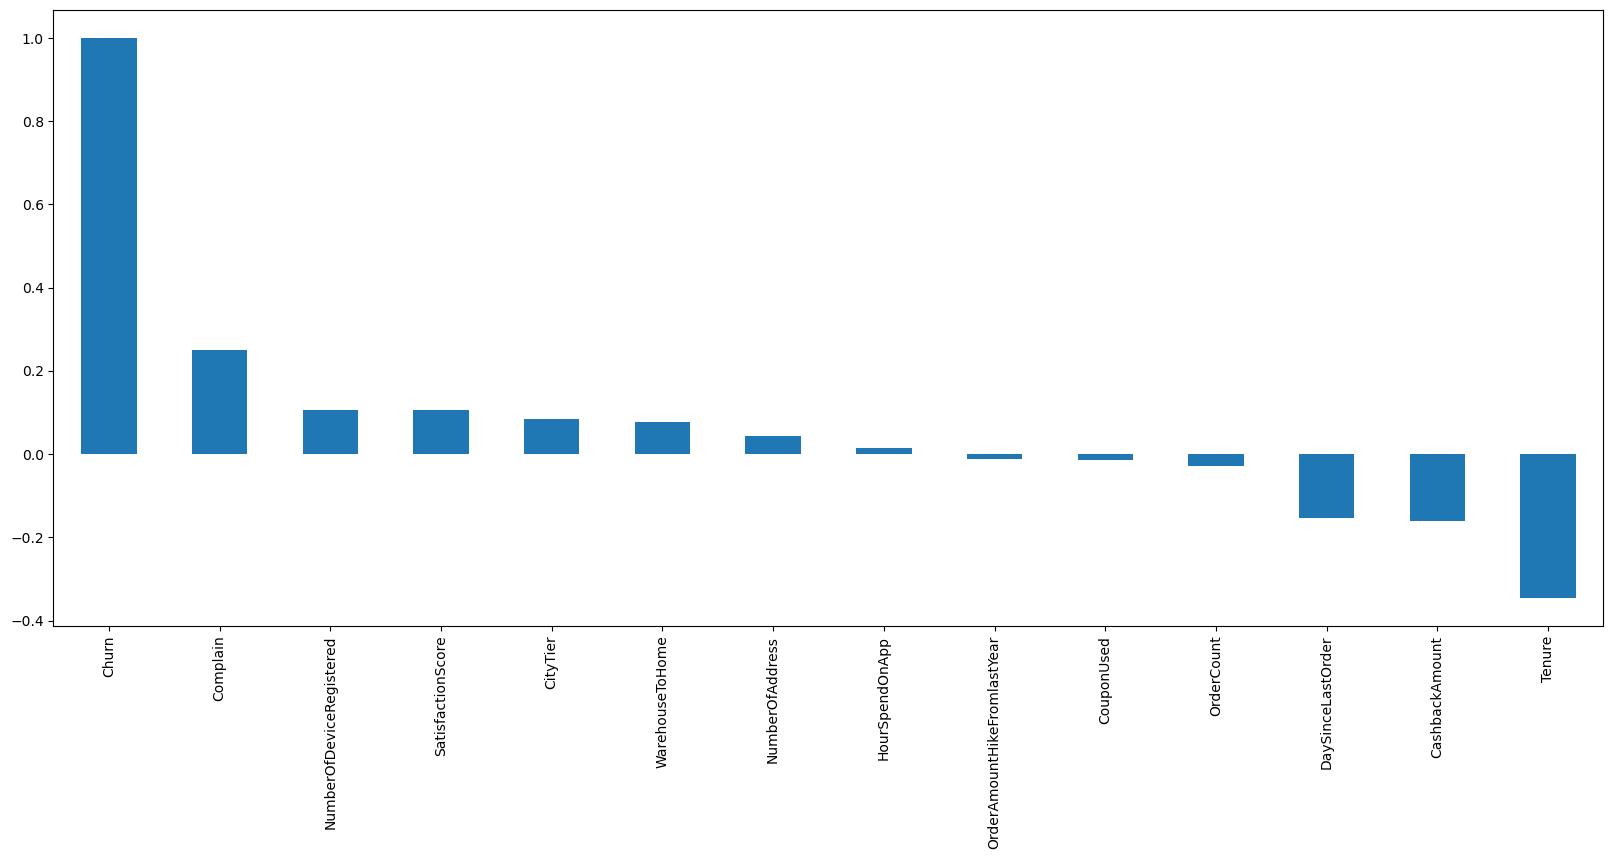

In [45]:
plt.figure(figsize=(20, 8))
eda_df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

The kde plot reinforces much of the observations made fromm the correlation matrix. Additionally, the following observations are made.
1. we can see that as cashback amount increased the churn also drops
2. Those who registered more than 3 devices has churned more than those who registered less number of devices.
3. #### Surpising Insight: customers with satisfaction score of above 3.5 tend to churn more.
4. Interms of Tenure, majority of churners  have a Tenure length of less than 4 units. While churning descreases faster after tenure period of around 4 units. 
5. #### Another useful insight: After a Tenure of above 22, no customers has churned.  This indicates that if we can find a way to keep the customers for that long, then it is easier for them to stay longer. 


In [46]:
numericals.remove('Churn')

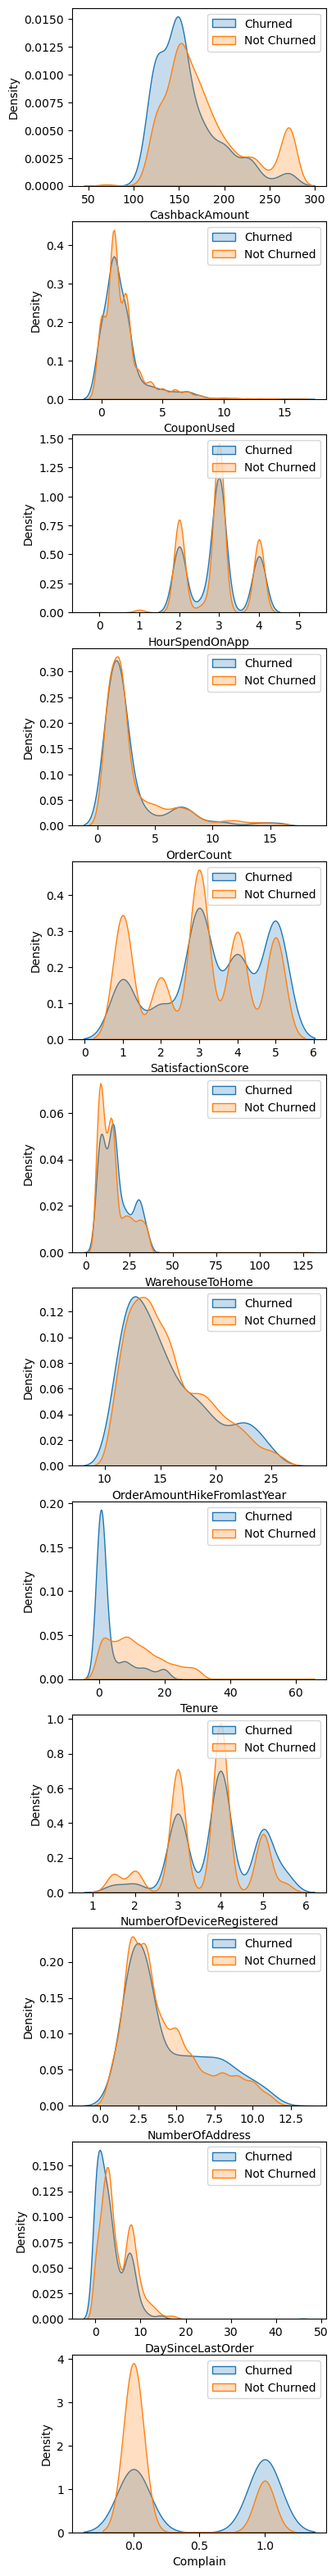

In [47]:
figure, axs = plt.subplots(12, 1, figsize=(4, 40))
for i, num_feat  in enumerate(numericals):
    sns.kdeplot(eda_df[eda_df['Churn']==1][num_feat], fill=True, ax=axs[i])
    sns.kdeplot(eda_df[eda_df['Churn']==0][num_feat], fill=True, ax=axs[i])
    axs[i].legend(['Churned', 'Not Churned'])
    

## 2. Bivariate Analysis

In [48]:
eda_churned = eda_df[eda_df['Churn']==1]
eda_not_churned = eda_df[eda_df['Churn']==0]

In [49]:
categoricals

['Gender',
 'PreferedOrderCat',
 'PreferredLoginDevice',
 'PreferredPaymentMode',
 'MaritalStatus',
 'CityTier']

1. single-male and single-female make more proportion of churned customers than unchurned customers. Divorced male and female make the same proportion in both churned and unchurned customers pool.
2. 

Gender           Female                          Male                    
MaritalStatus  Divorced   Married    Single  Divorced   Married    Single
Churn                                                                    
0              0.064075  0.219564  0.121743  0.090560  0.344724  0.159334
1              0.050633  0.118143  0.198312  0.080169  0.244726  0.308017

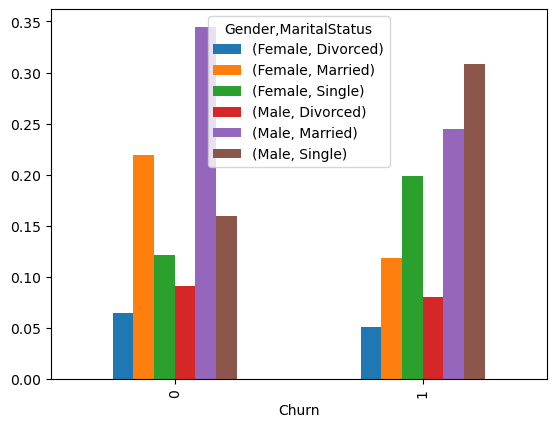

In [50]:
con_table = pd.crosstab(eda_df['Churn'], [eda_df['Gender'], eda_df['MaritalStatus']], normalize='index')
con_table.plot(kind='bar')
con_table

There is no interesting relation ship between PreferredPaymentMode PreferredLoginDevice and churning tendency.

PreferredPaymentMode       CC                 COD           Debit Card  \
PreferredLoginDevice Computer     Phone  Computer     Phone   Computer   
Churn                                                                    
0                     0.09654  0.228535  0.019223  0.063221   0.120889   
1                     0.07173  0.194093  0.050633  0.084388   0.151899   

PreferredPaymentMode            E wallet                 UPI            
PreferredLoginDevice     Phone  Computer     Phone  Computer     Phone  
Churn                                                                   
0                     0.297309  0.023921  0.077317  0.019223  0.053823  
1                     0.223629  0.037975  0.109705  0.029536  0.046414

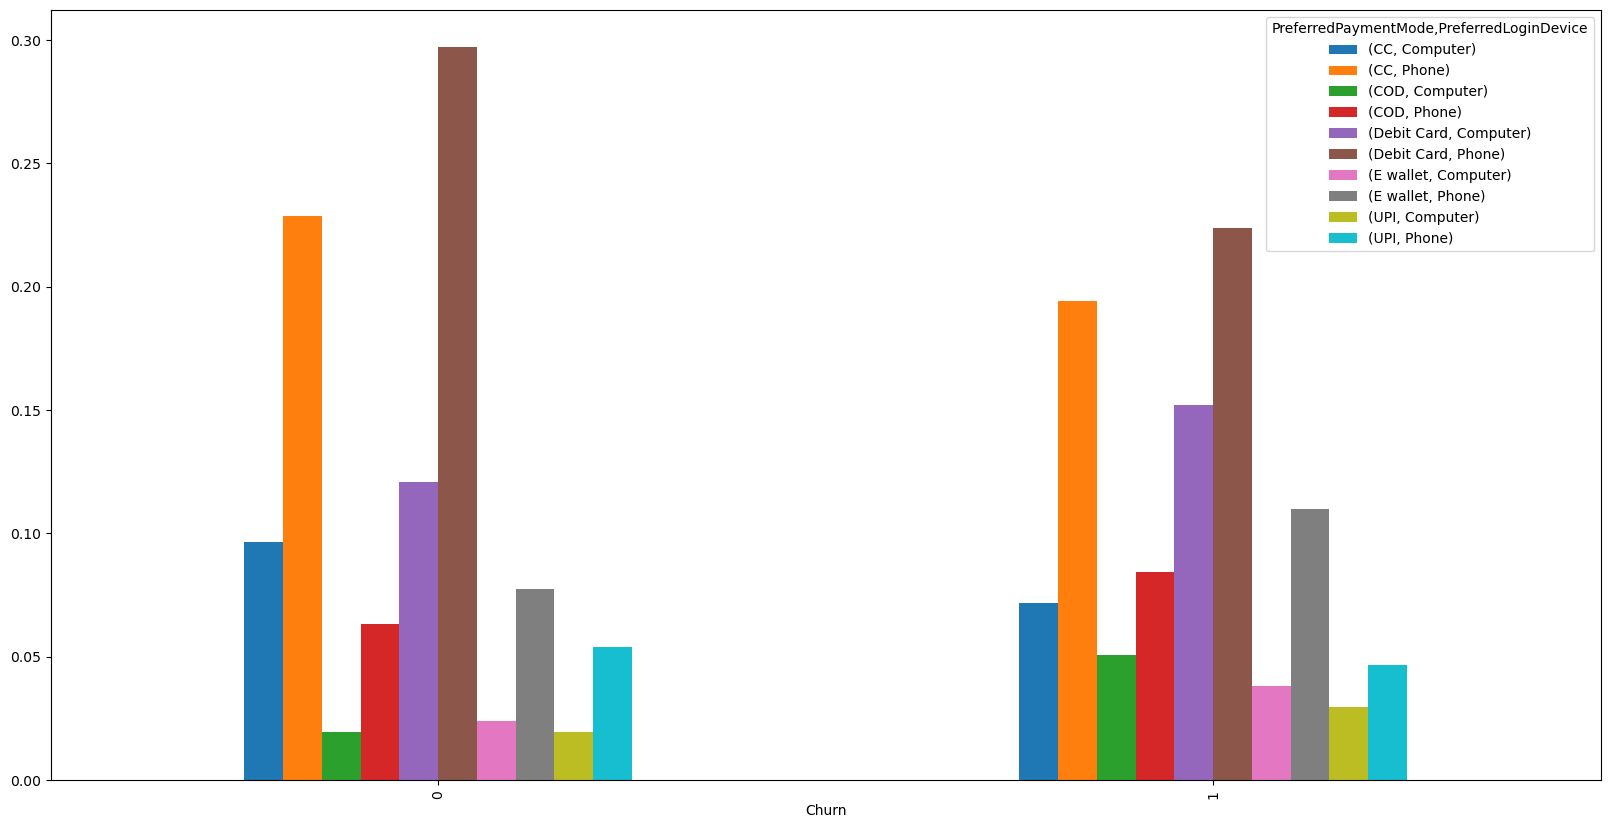

In [51]:
con_table = pd.crosstab(eda_df['Churn'], [eda_df['PreferredPaymentMode'], eda_df['PreferredLoginDevice']],  normalize='index')
con_table.plot(kind='bar', figsize=(20, 10))
con_table

In [52]:
con_table.sort_index()

PreferredPaymentMode       CC                 COD           Debit Card  \
PreferredLoginDevice Computer     Phone  Computer     Phone   Computer   
Churn                                                                    
0                     0.09654  0.228535  0.019223  0.063221   0.120889   
1                     0.07173  0.194093  0.050633  0.084388   0.151899   

PreferredPaymentMode            E wallet                 UPI            
PreferredLoginDevice     Phone  Computer     Phone  Computer     Phone  
Churn                                                                   
0                     0.297309  0.023921  0.077317  0.019223  0.053823  
1                     0.223629  0.037975  0.109705  0.029536  0.046414

Both Male and Female who orders Mobile/Mobile Phone tend to churn more. While both gender tend to stay when ordering Laptop & Accessory, and grocery.

Gender              Female                                                   \
PreferedOrderCat   Fashion   Grocery Laptop & Accessory    Mobile    Others   
Churn                                                                         
0                 0.065357  0.041435           0.164887  0.117898  0.015805   
1                 0.050633  0.004219           0.075949  0.223629  0.012658   

Gender                Male                                                   
PreferedOrderCat   Fashion   Grocery Laptop & Accessory    Mobile    Others  
Churn                                                                        
0                 0.083725  0.041862           0.228108  0.204613  0.036309  
1                 0.084388  0.016878           0.145570  0.377637  0.008439

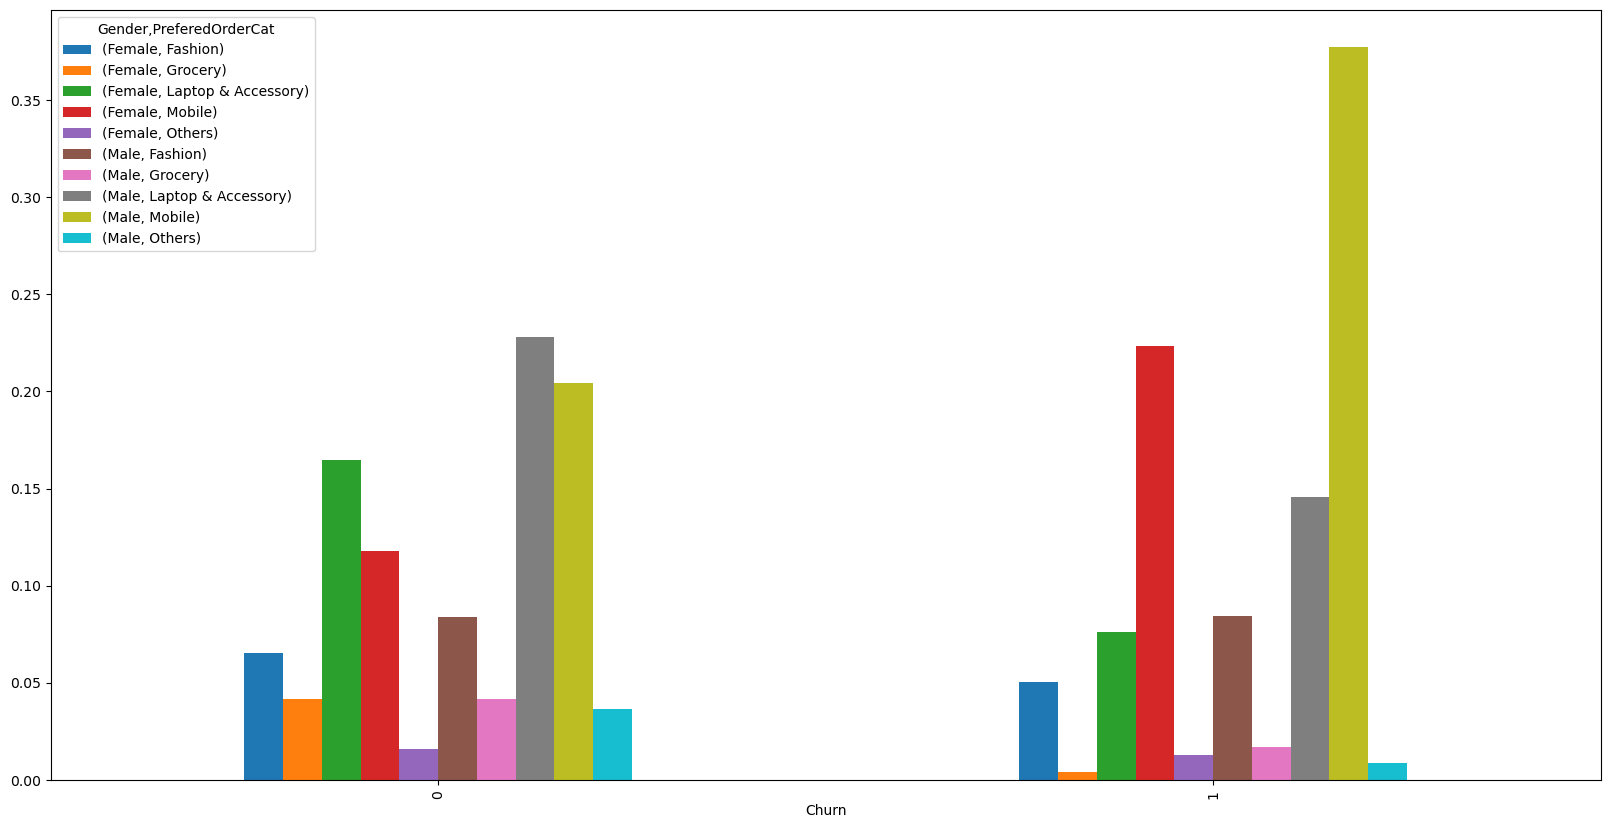

In [53]:
con_table = pd.crosstab(eda_df['Churn'], [eda_df['Gender'], eda_df['PreferedOrderCat']], normalize='index')
con_table.plot(kind='bar', figsize=(20, 10))
con_table

MaritalStatus  Divorced                       Married                      \
CityTier            1.0       2.0       3.0       1.0       2.0       3.0   
Churn                                                                       
0              0.098676  0.006408  0.049551  0.379752  0.025203  0.159334   
1              0.082278  0.004219  0.044304  0.200422  0.042194  0.120253   

MaritalStatus    Single                      
CityTier            1.0       2.0       3.0  
Churn                                        
0              0.190944  0.009825  0.080308  
1              0.278481  0.004219  0.223629

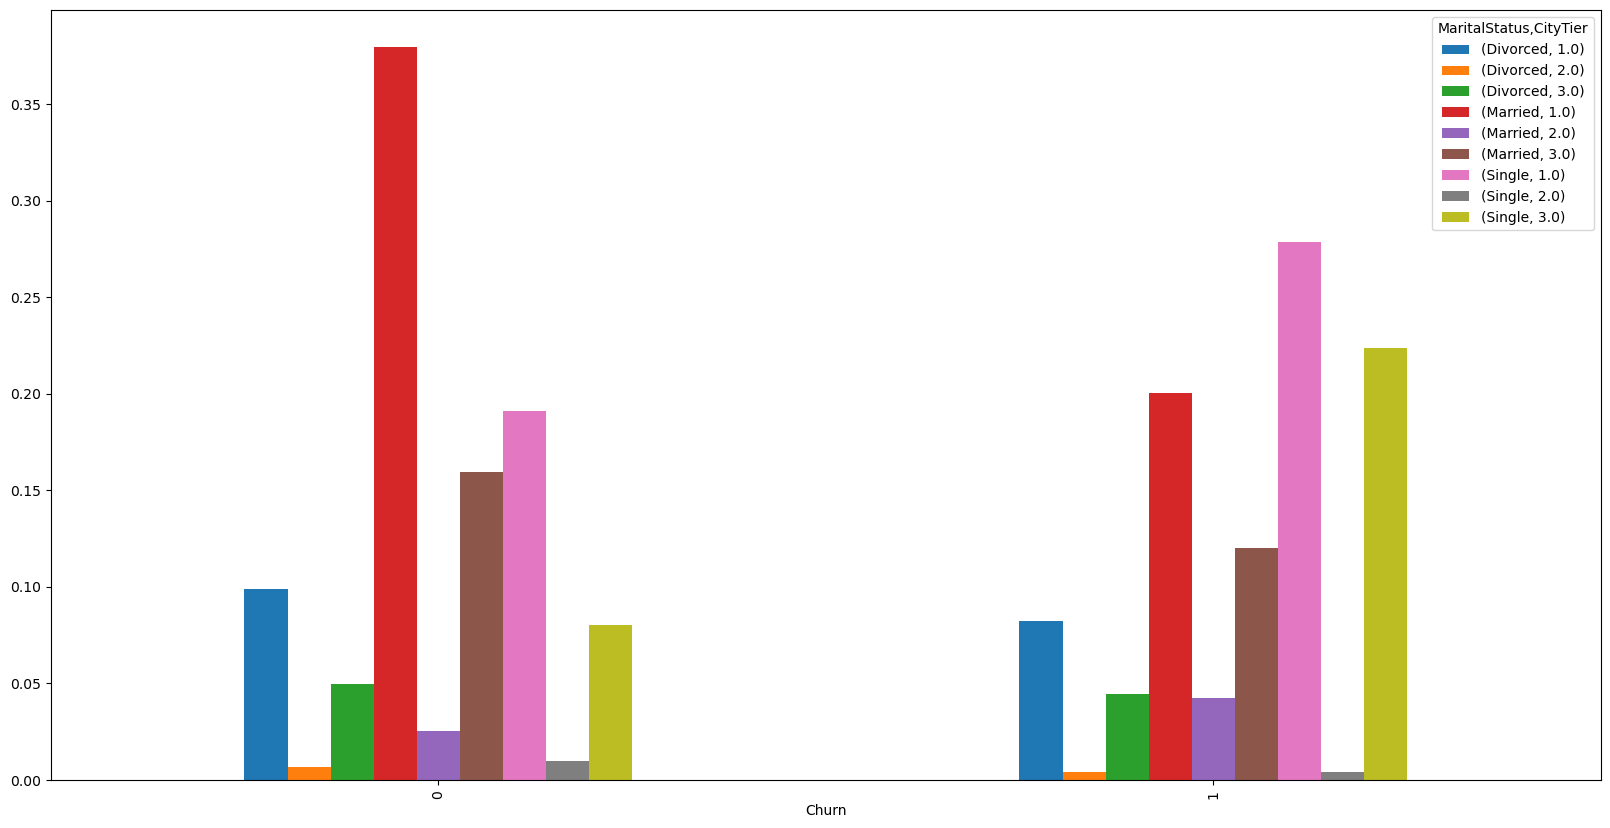

In [54]:
con_table = pd.crosstab(eda_df['Churn'], [eda_df['MaritalStatus'], eda_df['CityTier']], normalize='index')
con_table.plot(kind='bar', figsize=(20, 10))
con_table

In [84]:
eda_df = pd.read_csv('Imputed_df.csv')
eda_df = eda_df.drop(['Unnamed: 0'], axis=1)

In [85]:
eda_df['avg_cashbk_per_order'] = eda_df['CashbackAmount'] / eda_df['OrderCount']
numericals.append('avg_cashbk_per_order')
city_tier = pd.get_dummies(eda_df['CityTier'], prefix='CityTier')
eda_df = eda_df.merge(city_tier, left_index=True, right_index=True)
eda_df.drop(['CityTier'], axis=1, inplace=True)

In [86]:
scalable_features = ["WarehouseToHome", "HourSpendOnApp", "NumberOfDeviceRegistered", "SatisfactionScore", \
                      "NumberOfAddress", "Complain", "OrderAmountHikeFromlastYear", "CouponUsed", \
                     "OrderCount", "DaySinceLastOrder", "CashbackAmount", "Tenure", "avg_cashbk_per_order"]


In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
tmp = eda_df[scalable_features]
scaler.fit(tmp)
tmp = scaler.transform(tmp)
scaled = pd.DataFrame(tmp, columns = scaler.get_feature_names_out())
eda_df.drop(scalable_features, axis=1, inplace=True)
eda_df = eda_df.merge(scaled, left_index=True, right_index=True)


C:\Users\examination8550\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\examination8550\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\examination8550\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\examination8550\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\examina

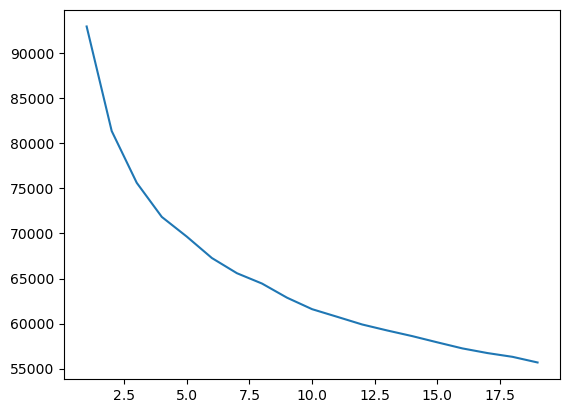

In [88]:
from sklearn.cluster import KMeans 
wss =[] 
for i in range(1,20):
    k_means = KMeans(n_clusters=i)
    k_means.fit(eda_df)
    wss.append(k_means.inertia_)
plt.plot(range(1,20), wss)

In [89]:
k_means = KMeans(n_clusters = 4)
k_means.fit(eda_df)
labels = k_means.labels_
eda_df["Clus_kmeans"] = labels

C:\Users\examination8550\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [90]:
clust = pd.get_dummies(eda_df['Clus_kmeans'], prefix='Clus_kmeans')
eda_df = eda_df.merge(clust, left_index=True, right_index=True)
eda_df.drop(['Clus_kmeans'], axis=1, inplace=True)

### Handling class imbalance
There are 3 common techniques for oversampling the minority class withour overfitting problem(excluding resampling): SMOTE, SMOTE borderline and ADASYN. Depending on the dataset,   each have a use-case that they are best fit for. 
1. depending on the distribution of the class, SMOTE is a good choice if the minority class is very small and the majority class is very large. SMOTE Borderline is a good choice if the minority class is small but not as small as it would be for SMOTE. ADASYN is a good choice if the minority class is small and there are a lot of outliers in the majority class.
2. Based on the type of data,  SMOTENC can be used with both numerical and categorical data. ADASYN can only be used with numerical data.

As can be seen from the plot, the churning customers are small(14%) but not very small as compared to customers that didnt churn. Hence,  SMOTEBC would be a good fit since our dataset is a mix of numerical and categorical features.


<Axes: xlabel='Churn', ylabel='count'>

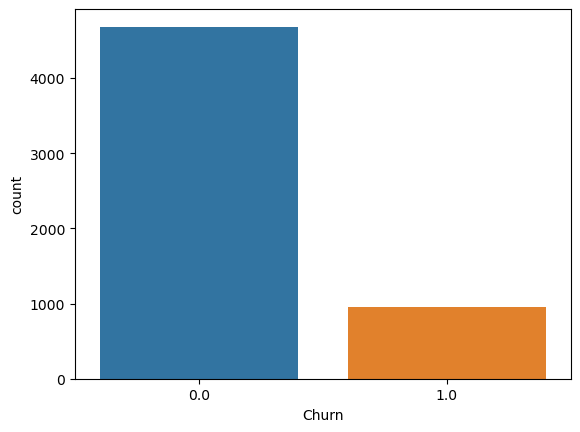

In [91]:
sns.countplot(data=eda_df, x='Churn')

### Understanding the percentage of Outliers for ease of selecting upsampling technique
Local Outlier Factor (LOF) is an unsupervised anomaly detection algorithm that computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors.

LOF works by first calculating the local density of each data point. This is done by finding the k nearest neighbors of each data point and then calculating the average distance between the data point and its neighbors. The data points with the lowest local densities are considered to be outliers.

#### Conclusion
1. The minority class has more outliers than the majority class. 

In [92]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

# Load the dataset
df = eda_df

# Create a LocalOutlierFactor object
lof = LocalOutlierFactor(n_neighbors=5, novelty=False)

# Fit the model to the data
# Predict the outliers
outliers = lof.fit_predict(df)

# Identify the majority and minority classes
majority_class = df["Churn"].value_counts().index[0]
minority_class = df["Churn"].value_counts().index[1]

# Calculate the percentage of outliers in each class
majority_outliers = np.sum((outliers==-1) & (df['Churn']==0)) / len(df[df["Churn"] == majority_class])
minority_outliers = np.sum((outliers==-1) & (df['Churn']==1)) / len(df[df["Churn"] == minority_class])

# Compare the percentages of outliers in each class
if majority_outliers > minority_outliers:
    print(f"The majority class has more outliers than the Minority class with outliers percentage of {majority_outliers*100:.2f} %.")
else: 
    print(f"The minority class has more outliers than the Majority class with outliers percentage of  {minority_outliers*100:.2f} %.")


The minority class has more outliers than the Majority class with outliers percentage of  0.11 %.


### upsampling the minority class using SMOTENC

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x = eda_df.drop(['Churn'], axis=1)
y = eda_df['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

categ = list(set(list(eda_df.columns)) - set(scalable_features))
categ.remove('Churn')
x_feat = list(set(x.columns))
categ_index = []
for feat in categ:
    categ_index.append(x_feat.index(feat))


In [94]:
from imblearn.over_sampling import SMOTENC

smote =SMOTENC(categorical_features=categ_index, random_state=2)
x_resampled, y_resampled = smote.fit_resample(x, y)

<Axes: >

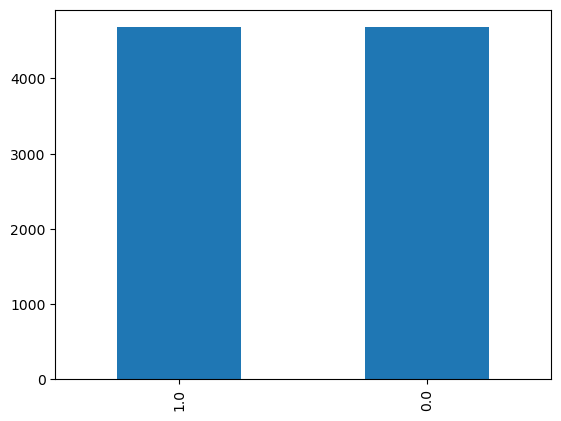

In [95]:
y_resampled.value_counts().plot(kind='bar')

In [104]:
x_train.columns

Index(['PreferredLoginDevice_Computer', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_CC', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet',
       'PreferredPaymentMode_UPI', 'Gender_Female', 'Gender_Male',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'CityTier_1.0',
       'CityTier_2.0', 'CityTier_3.0', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Tenure', 'avg_cashbk_per_order',
       'Clus_kmeans_0', 'Clus_kmeans_1', 'Clus_kmeans_2', 'Clus_kmeans_3'],
      dtype='object')

### Building Models

### A. Logistic Regression
from the result below the model is fairly good on non-churning customer prediction. However, for churning customers, the precision is much lower than recall. This indicate that our model will classify more custors as churners eventhough they are not. It is like a paranoid model that suspects every customers of churning eventhough the paranoia is only valid 48% of  the time. Having low precision is not as bad as having low recall for this paricular problem. It is better to assume customer is going to churn and do the right thing than assuming that they will stay and end up losing the customer.

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression(random_state=0).fit(x_resampled, y_resampled)

predicted  = model.predict(x_test)
print(classification_report(y_test, predicted))

lr_probs = model.predict_proba(x_test)[:, 1]
AUC = roc_auc_score(y_test, lr_probs)
fpr, tpr, threshold = roc_curve(y_test, lr_probs)

              precision    recall  f1-score   support

         0.0       0.94      0.87      0.90      1415
         1.0       0.52      0.73      0.60       274

    accuracy                           0.85      1689
   macro avg       0.73      0.80      0.75      1689
weighted avg       0.87      0.85      0.86      1689



C:\Users\examination8550\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Hyperparameter Optimization
Although there is slight improvement in accuracy, the precision and recall for churning customers are still low. Hence, we will try other models.

In [69]:
from sklearn.model_selection import GridSearchCV
log_reg = LogisticRegression()
penalties = ['l1', 'l2']
Cs = np.logspace(-4, 4, 10)
solvers = ['lbfgs', 'liblinear']
param_grid = {'penalty': penalties, 
             'C': Cs, 
             'solver': solvers}
clf = GridSearchCV(log_reg, param_grid, verbose=True)
clf.fit(x_train, y_train)
best_clf = clf.best_estimator_
print(best_clf)
predicted  = best_clf.predict(x_test)
print(classification_report(predicted, y_test))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\examination8550\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\examination8550\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

LogisticRegression(C=0.3593813663804626)
              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94      1514
         1.0       0.49      0.77      0.60       175

    accuracy                           0.89      1689
   macro avg       0.73      0.84      0.77      1689
weighted avg       0.92      0.89      0.90      1689



C:\Users\examination8550\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\examination8550\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\examination8550\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\examination8550\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in 

### B. Decision Trees

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
predict = clf.predict(x_test)
print(classification_report(predicted, y_test))

lr_probs = clf.predict_proba(x_test)[:, 1]
dt_AUC = roc_auc_score(y_test, lr_probs)
dt_fpr, dt_tpr, threshold = roc_curve(y_test, lr_probs)

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      1305
         1.0       0.73      0.52      0.60       384

    accuracy                           0.85      1689
   macro avg       0.80      0.73      0.75      1689
weighted avg       0.84      0.85      0.84      1689



### C. Random Forest
Random forest has the best precision and recall for the churning customers. As we said previously, recall is more important than precision for this case. Hence, a recall of 95% and precicion of 76% is good. 

In [107]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
predicted = clf.predict(x_test)
print(classification_report(predicted, y_test))

lr_probs = clf.predict_proba(x_test)[:, 1]
rf_AUC = roc_auc_score(y_test, lr_probs)
rf_fpr, rf_tpr, threshold = roc_curve(y_test, lr_probs)

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      1468
         1.0       0.76      0.94      0.84       221

    accuracy                           0.95      1689
   macro avg       0.87      0.95      0.90      1689
weighted avg       0.96      0.95      0.95      1689



In [ ]:
clf = RandomForestClassifier()
param_grid = {"n_estimators": [100, 200, 300, 400, 500], 
             "criterion": ['gini', 'entropy'], 
             "max_depth": np.arange(2, 16, 2)}
clf = GridSearchCV(clf, param_grid, verbose=True)
clf.fit(x_train, y_train)
print(clf.best_estimator_)
predicted = clf.best_estimator_.predict(x_test)
print(classification_report(predicted, y_test))

### D. SVM

In [108]:
from sklearn.svm import SVC
clf = SVC(probability=True)
clf.fit(x_train, y_train)
predicted = clf.predict(x_test)
print(classification_report(predicted, y_test))

lr_probs = clf.predict_proba(x_test)[:, 1]
svm_AUC = roc_auc_score(y_test, lr_probs)
svm_fpr, svm_tpr, threshold = roc_curve(y_test, lr_probs)

              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95      1516
         1.0       0.54      0.86      0.66       173

    accuracy                           0.91      1689
   macro avg       0.76      0.89      0.81      1689
weighted avg       0.94      0.91      0.92      1689



In [76]:
print(len(set(list(x_train.columns))),  len(list(x_train.columns)))

37 38


In [79]:
x_train.drop(['SatisfactionScore'], axis=1, inplace=True)
x_test.drop(['SatisfactionScore'], axis=1, inplace=True)



### E. XGBOOST

In [109]:
from xgboost import XGBClassifier
params = {'lambda': 2.5602828192078184, 'alpha': 0.001833231166699566, 'colsample_bytree': 1.0, 'subsample': 0.6, \
          'learning_rate': 0.012, 'n_estimators': 3000, 'max_depth': 7, 'min_child_weight': 1}
clf = XGBClassifier(**params)
clf.fit(x_train, y_train)
predicted = clf.predict(x_test)
print(classification_report(predicted, y_test))

lr_probs = clf.predict_proba(x_test)[:, 1]
xg_AUC = roc_auc_score(y_test, lr_probs)
xg_fpr, xg_tpr, threshold = roc_curve(y_test, lr_probs)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1441
           1       0.84      0.93      0.89       248

    accuracy                           0.96      1689
   macro avg       0.92      0.95      0.93      1689
weighted avg       0.97      0.96      0.97      1689



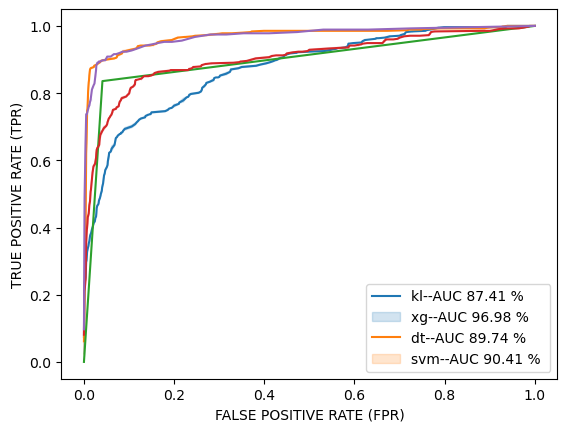

In [110]:
ax = sns.lineplot(x=fpr, y=tpr)
ax = sns.lineplot(x=xg_fpr, y=xg_tpr)
ax = sns.lineplot(x=dt_fpr, y=dt_tpr)
ax = sns.lineplot(x=svm_fpr, y=svm_tpr)
ax1 = sns.lineplot(x=rf_fpr, y=rf_tpr)


ax.set_xlabel('FALSE POSITIVE RATE (FPR)')
ax.set_ylabel('TRUE POSITIVE RATE (TPR)')
ax.legend([f'kl--AUC {AUC*100:.2f} % ', f'xg--AUC {xg_AUC*100:.2f} % ', f'dt--AUC {dt_AUC*100:.2f} % ', \
           f'svm--AUC {svm_AUC*100:.2f} % '])#, f'rf--AUC {rf_AUC*100:.2f} % '])


From the feature importance, we can see that Tenure, and Complain are the best predictors of churning. coming from cit tier 2, being in the third cluster, single are also stronger predictors of churning.

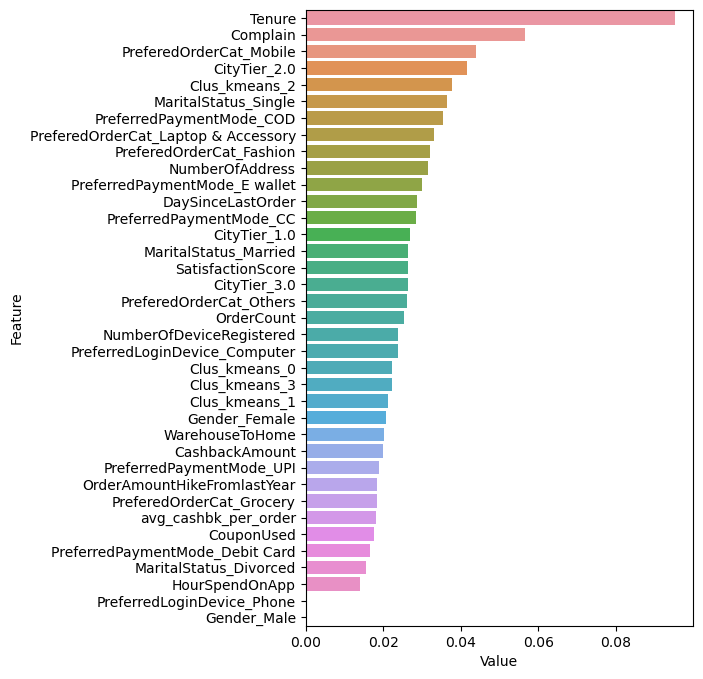

In [141]:
plt.figure(figsize=(5, 8))
f_df = pd.DataFrame({'Value': clf.feature_importances_, 'Feature': x_train.columns}).sort_values(by='Value', ascending=False)
ax = sns.barplot(data=f_df, x='Value', y='Feature')


### Conculsion

Thhe XGBoost model is the best performing model. It has an AUC score of 96.98% and Accuracy of 96%. For churning customers, the recall is 93% which is important to take the right action to prevent to customers with churning tendency. The precision is 84% for churning customers and 99% for non churning customers. Although this is not the ideal score, 99% precisionn for non churners means that when the model tells us that the customer is not hoing to churn, it is correct 99% of the time. However, when the model tells us the cusomor is going to churn it is right 84% of the time. Though it is wrong 16% of the time, it is better to assume customer is going to churn and do the right thing than expect them to stay and end up losing them.